In [1]:
%matplotlib inline

# Train Node Classification Model without Graph

Node classification model can be realised with neural networks with Fully-Connected Layers (FCNs) without using graph models. However, in our manuscript, we demonstrated that the graph model based on Neighborhood Gene Component has the advantage of message passing, so that the predicted labels of neighboring transcripts are similar. Here we use 10x Xenium DCIS data {cite}`janesick2022high` as an example to demonstrate the advantage of graph models in the node (transcript) classification.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import Bering as br

### load data

In [3]:
df_spots_all = br.datasets.xenium_dcis_janesick()
df_spots_seg = df_spots_all[df_spots_all['labels'] != 'background'] # foreground nodes
df_spots_unseg = df_spots_all[df_spots_all['labels'] == 'background'] # background nodes

### Create Bering object and training data

In [4]:
# image-dependent segmentation
bg = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 10, window_width = 15.0, window_height = 15.0, n_neighbors = 30)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

### Training (without Graph)

Training node classifier:  98%|█████████▊| 49/50 [00:38<00:00,  1.65it/s]

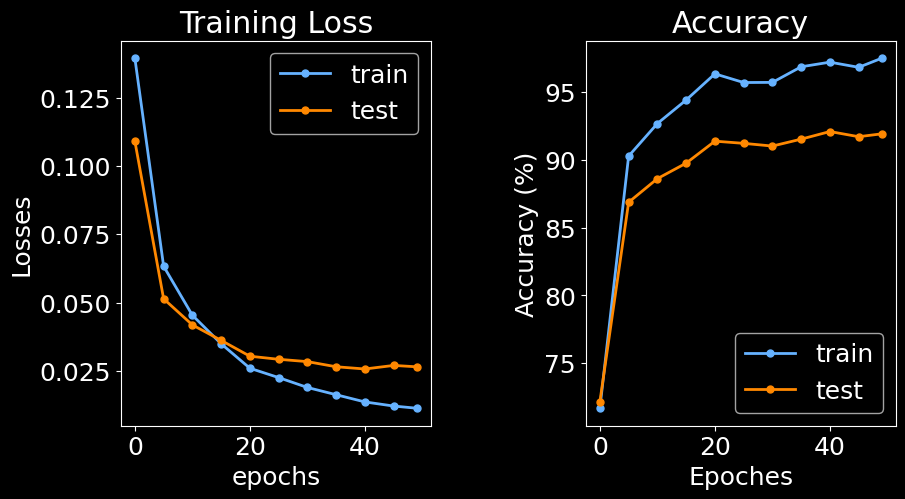

Training edge classifier:  98%|█████████▊| 49/50 [01:08<00:01,  1.22s/it]

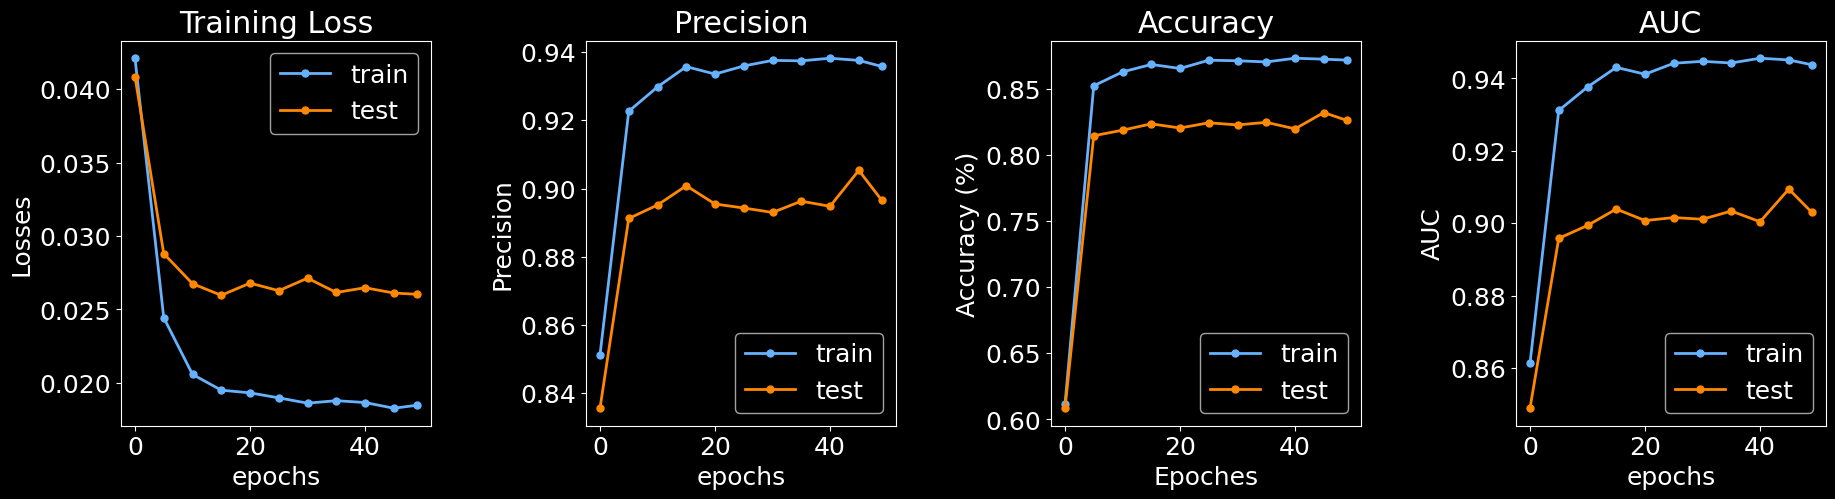

Training edge classifier: 100%|██████████| 50/50 [01:11<00:00,  1.42s/it]


In [5]:
br.train.Training(bg, baseline = True)

### Training (with graph)

Training node classifier:  98%|█████████▊| 49/50 [01:28<00:01,  1.44s/it]

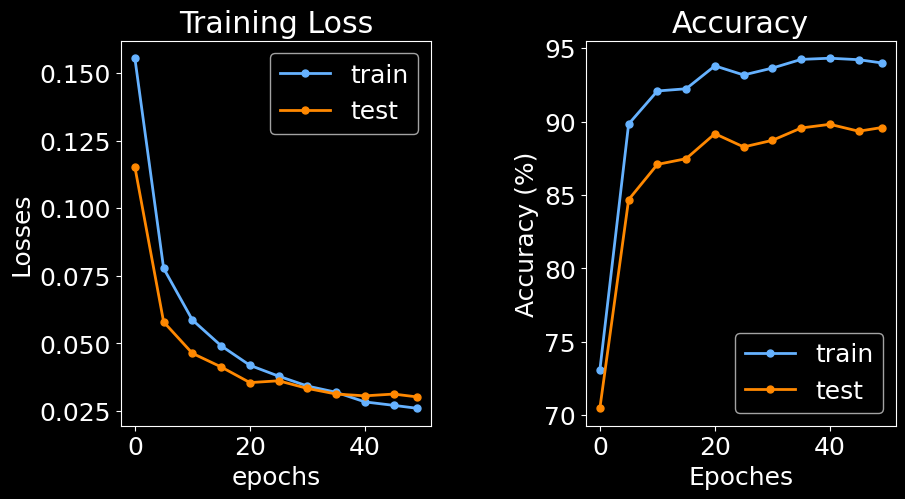

Training edge classifier:  98%|█████████▊| 49/50 [01:36<00:01,  1.74s/it]

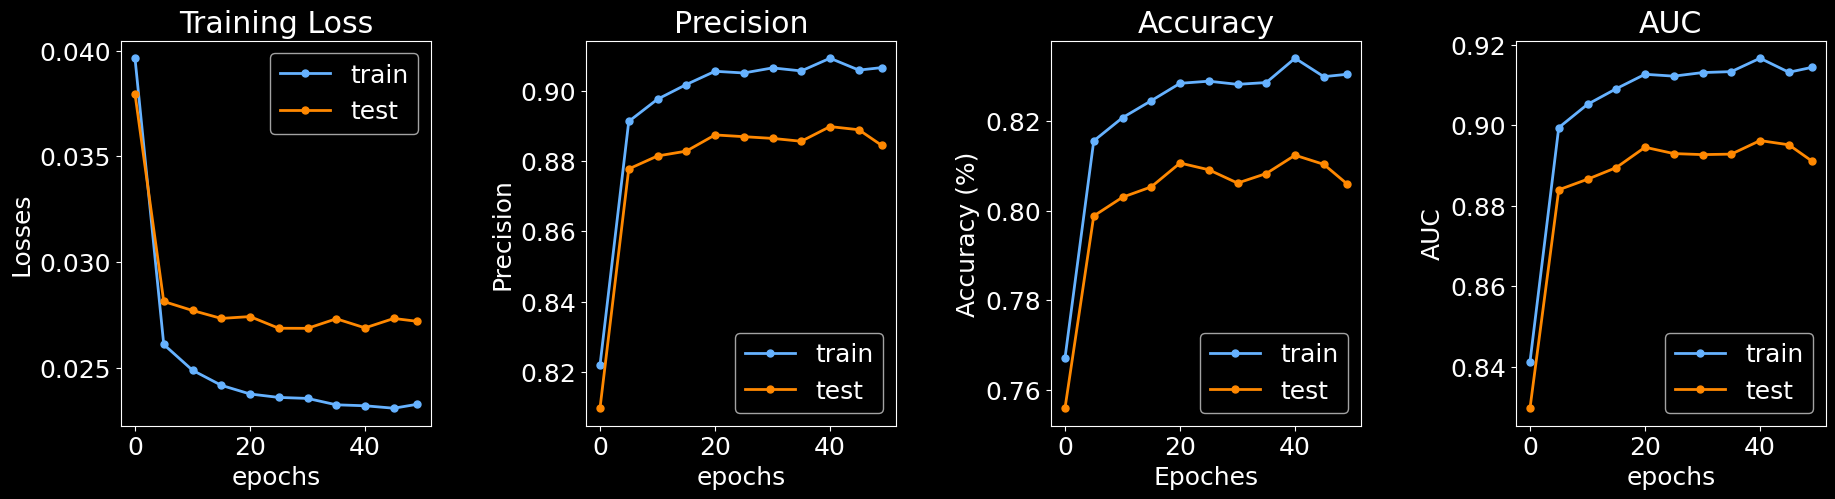

Training edge classifier: 100%|██████████| 50/50 [01:40<00:00,  2.01s/it]


In [6]:
# image-dependent segmentation
bg_graph = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg_graph, n_cells_perClass = 10, window_width = 15.0, window_height = 15.0, n_neighbors = 30)
br.graphs.CreateData(bg_graph, batch_size = 16, training_ratio = 0.8)
br.train.Training(bg_graph, baseline = False)

### Comparison of two predictions

In [7]:
# randomly select a cell
random.seed(42)
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]

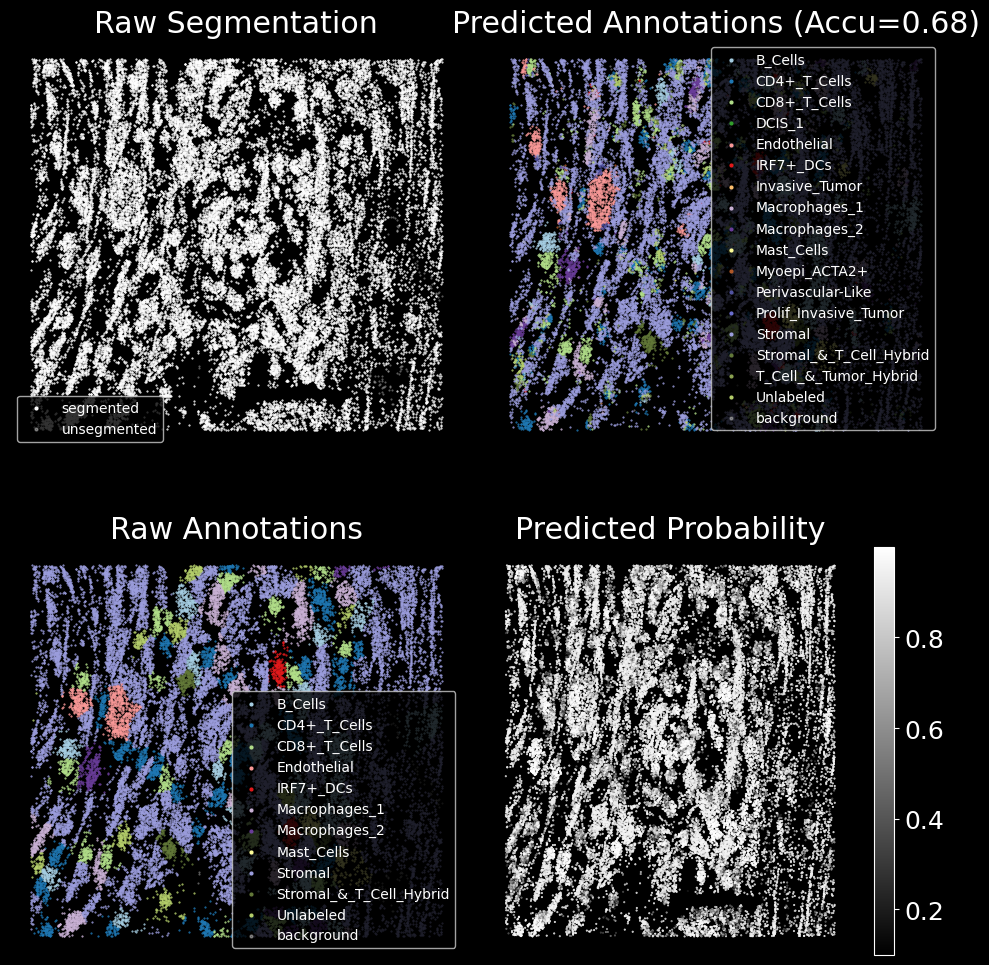

In [8]:
# plot node classification
_,_,_ = br.pl.Plot_Classification(
    bg, 
    cell_name = random_cell,
    n_neighbors = 30, 
    zoomout_scale = 8,
)

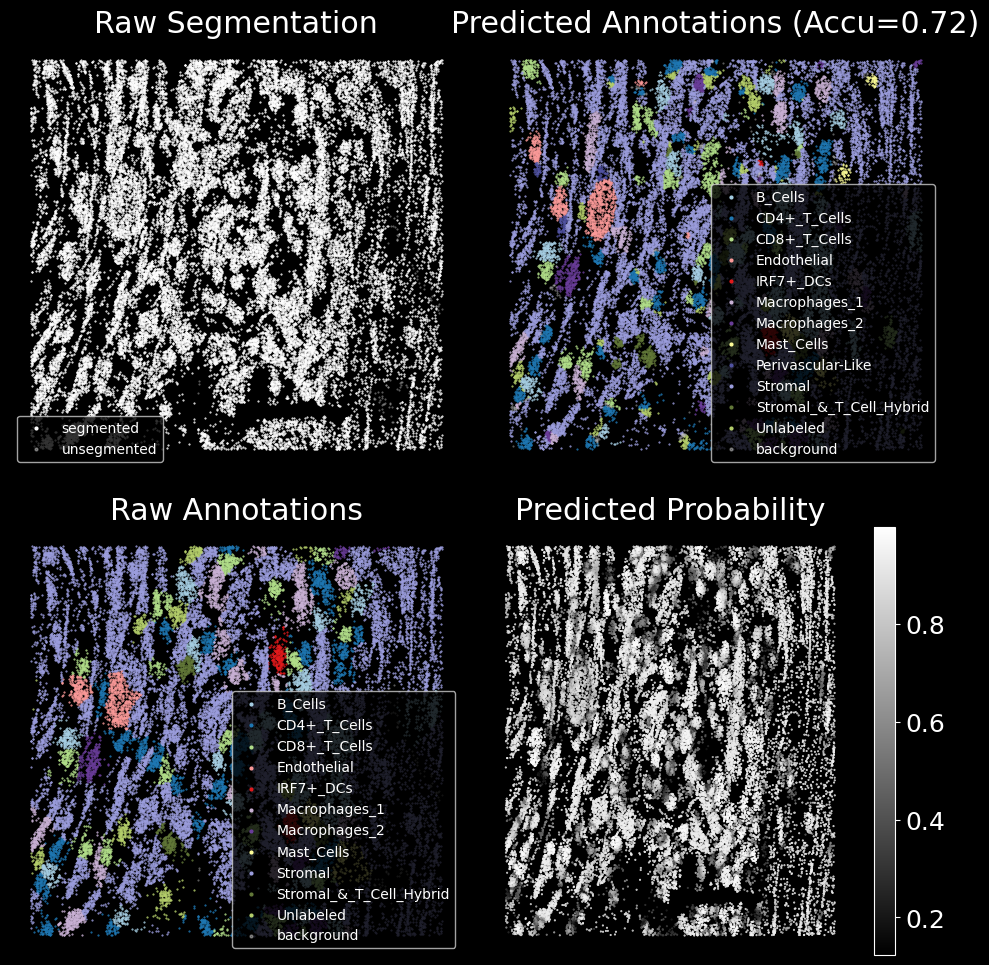

In [9]:
# plot node classification
_,_,_ = br.pl.Plot_Classification(
    bg_graph, 
    cell_name = random_cell,
    n_neighbors = 30, 
    zoomout_scale = 8,
)